**Importando bibliotecas**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import random

**Criando base**

Nossos dados terá uma distribuição normal -> $U[100;10]$.

In [4]:
dados= {"Normal": [random.normalvariate(100,10) for x in range(5000)]}
df= pd.DataFrame(dados)
df.head()

,Normal
0,93.321886
1,102.667287
2,88.983781
3,102.620456
4,94.335955


**Visualizando dados**

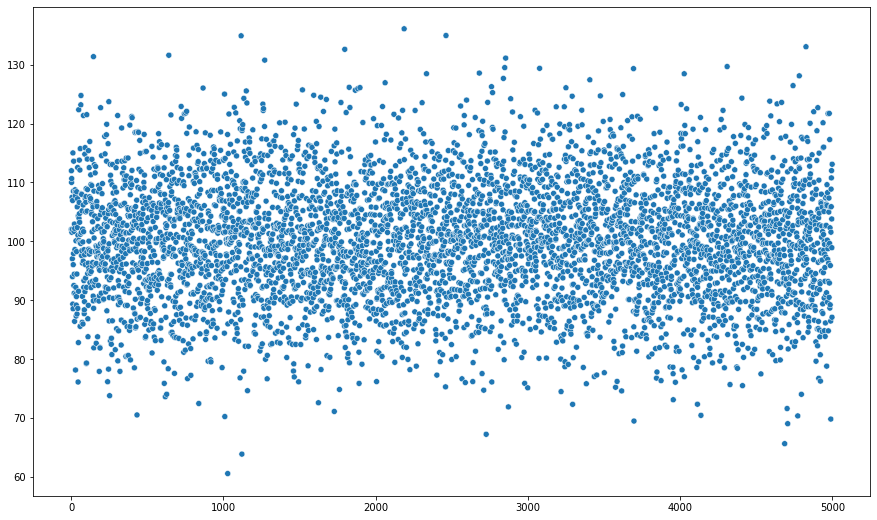

In [3]:
plt.figure(figsize=(15,9))

sns.scatterplot(data= df, legend= False)
plt.show()

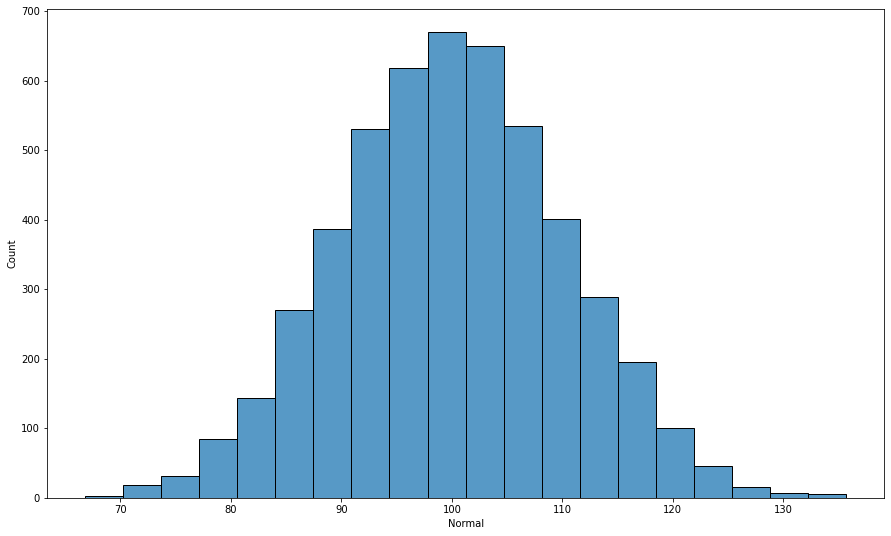

In [62]:
# Histograma
plt.figure(figsize=(15,9))
grafico= sns.histplot(df, x= "Normal", bins= 20)
plt.show()

**Usando Sklearn: KBinsDiscretizer**
 
O método que vamos analisar é o KBinsDiscretizer.

In [35]:
from sklearn.preprocessing import KBinsDiscretizer

model_Q= KBinsDiscretizer(n_bins= 20, encode= "ordinal", strategy= "quantile").fit(df[['Normal']])
model_U= KBinsDiscretizer(n_bins= 20, encode= "ordinal", strategy= "uniform").fit(df[['Normal']])
model_K= KBinsDiscretizer(n_bins= 20, encode= "ordinal", strategy= "kmeans").fit(df[['Normal']])

In [36]:
resultado_Q= model_Q.transform(df[['Normal']])
resultado_U= model_U.transform(df[['Normal']])
resultado_K= model_K.transform(df[['Normal']])

**Utilizando a estrategia: Quantile**
- Todos os compartimentos em cada recurso têm o mesmo número de pontos.

In [55]:
pd.DataFrame(resultado_Q)[0].value_counts()

5.0     252
10.0    251
12.0    251
7.0     251
15.0    251
18.0    251
2.0     250
13.0    250
1.0     250
19.0    250
3.0     250
0.0     250
16.0    250
8.0     250
17.0    249
11.0    249
9.0     249
14.0    249
6.0     249
4.0     248
Name: 0, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


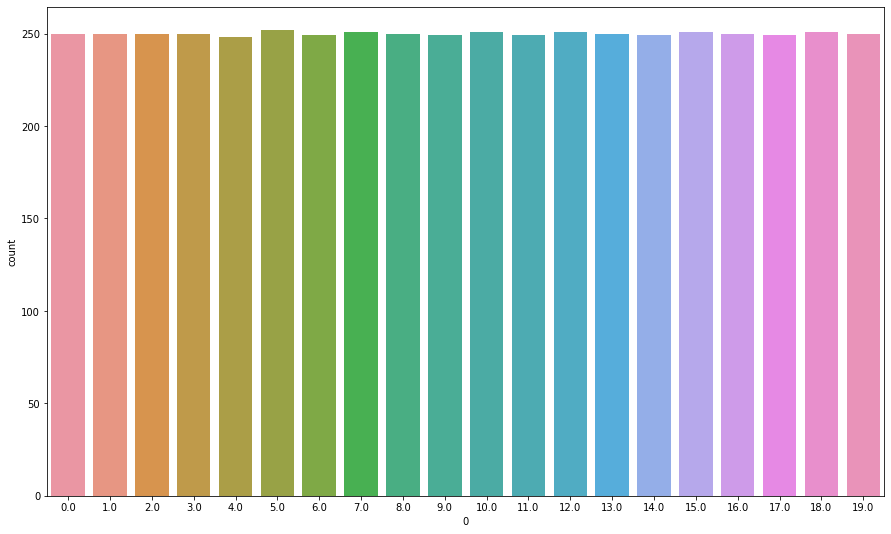

In [59]:
plt.figure(figsize=(15,9))
sns.countplot(pd.DataFrame(resultado_Q)[0])
plt.show()

**Utilizando a estrategia: Uniform**
- Todos os compartimentos em cada recurso têm larguras idênticas.

In [40]:
pd.DataFrame(resultado_U)[0].value_counts()

9.0     668
10.0    650
8.0     618
11.0    535
7.0     531
12.0    401
6.0     386
13.0    289
5.0     270
14.0    195
4.0     144
15.0    101
3.0      85
16.0     46
2.0      32
1.0      19
17.0     15
18.0      7
19.0      5
0.0       3
Name: 0, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


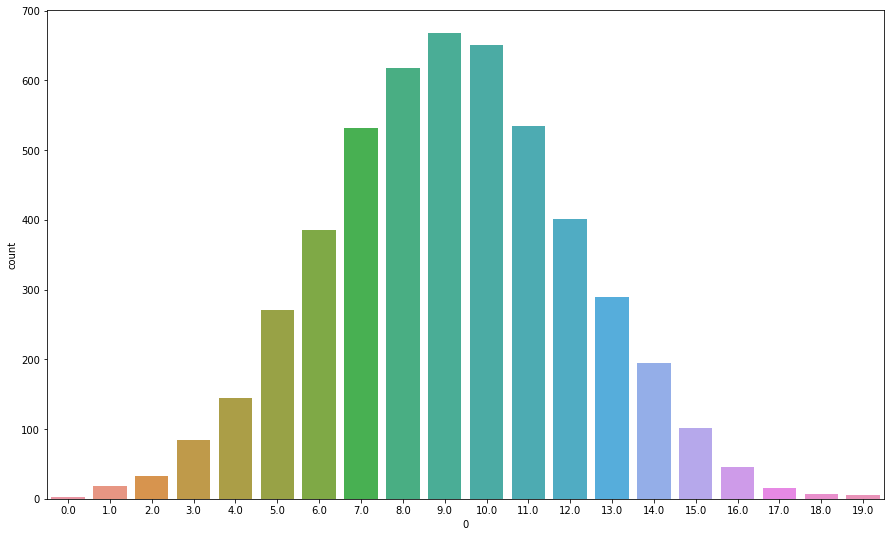

In [60]:
plt.figure(figsize=(15,9))
sns.countplot(pd.DataFrame(resultado_U)[0])
plt.show()

**Utilizando a estrategia: Kmeans**
- Os valores em cada bin têm o mesmo centro mais próximo de um cluster k-means 1D.

In [41]:
pd.DataFrame(resultado_K)[0].value_counts()

9.0     548
10.0    526
8.0     525
11.0    492
7.0     482
12.0    414
6.0     386
13.0    318
5.0     293
14.0    235
4.0     209
15.0    164
3.0     136
16.0    107
2.0      77
17.0     33
1.0      31
18.0     16
19.0      5
0.0       3
Name: 0, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


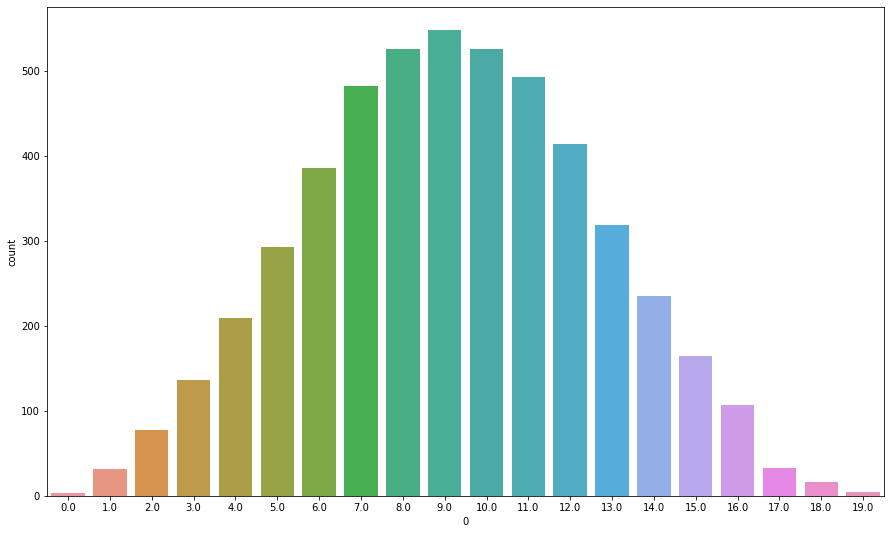

In [61]:
plt.figure(figsize=(15,9))
sns.countplot(pd.DataFrame(resultado_K)[0])
plt.show()